# Homework 4

@ Author Juanwu Lu

@ CS285 Fall 2022

&copy; UC Berkeley

In [1]:
import os
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
from os import path as osp

plt.style.use('seaborn-paper')
sns.set_style('whitegrid')

In [3]:
# Common Tensorboard result processing
# ====================================
def _process_df(df: pd.DataFrame, name: str = None) -> None:
    assert ('Step' in df.columns) and ('Value' in df.columns)
    df.sort_values(by=['Step'], inplace=True)
    df.rename(
        columns={'Step': 'Time Steps', 'Value': name or 'Value'},
        inplace=True
    )
    if 'Wall time in df.columns':
        df.drop(labels=['Wall time'], axis=1, inplace=True)

## Problem 1

Submit the qualitative model predictions (`itr_0_predictions.png`) for each of the three runs above. Comment on which model performs the best and why you think this might be the case.

## Problem 2

Submit this run as part of your `run_logs`, and include a plot of `Train_AverageReturn` and `Eval_AverageReturn` in your pdf.

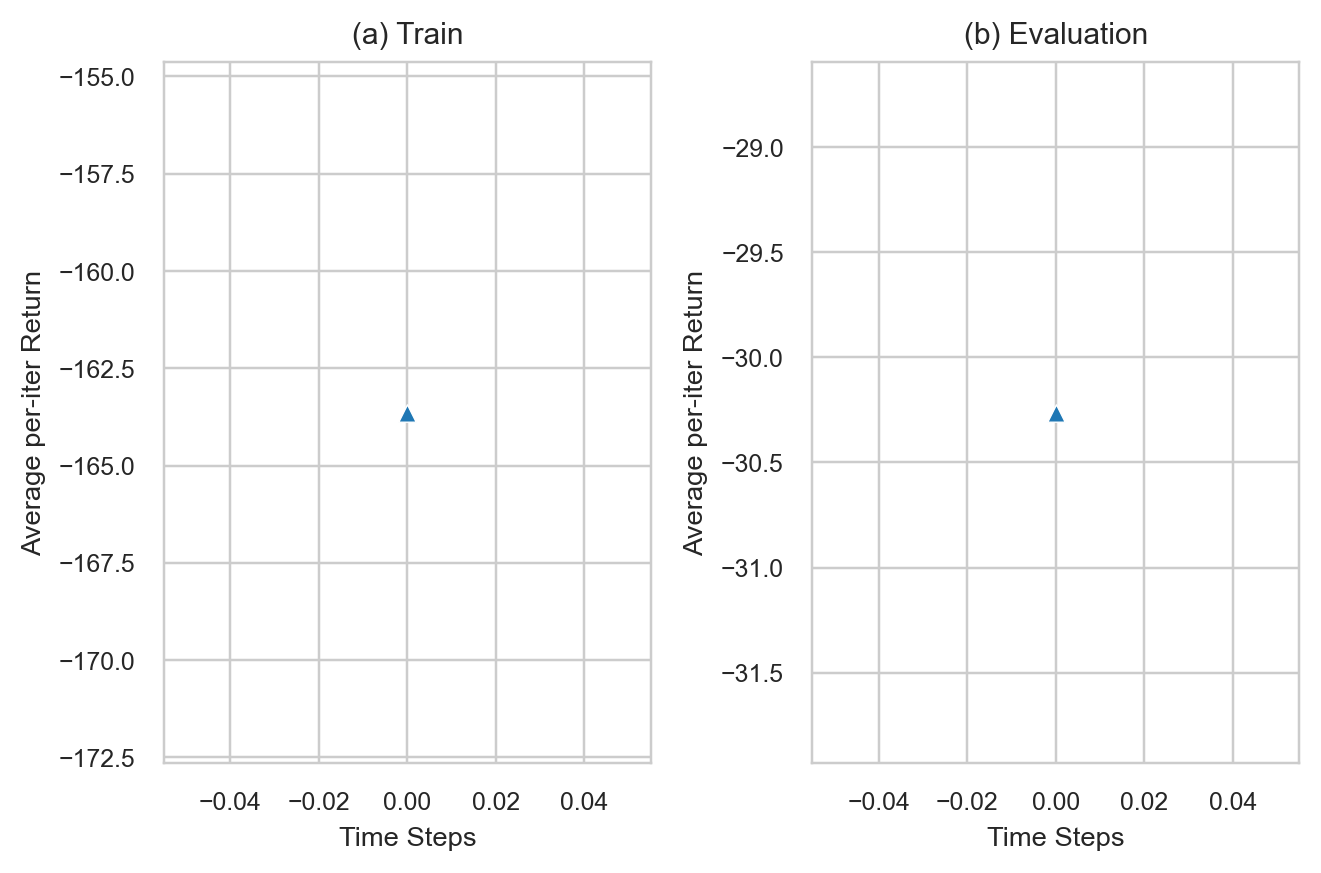

In [13]:
# Problem 2
trn_r_df = pd.read_csv(
    osp.join('./data/hw4/q2',
             'run-hw4_q2_obstacles_singleiteration_obstacles-cs285-v0'
             '_31-10-2022_03-28-49-tag-Train_AverageReturn.csv')
)
_process_df(trn_r_df, name='Average per-iter Return')
eval_r_df = pd.read_csv(
    osp.join('./data/hw4/q2',
             'run-hw4_q2_obstacles_singleiteration_obstacles-cs285-v0'
             '_31-10-2022_03-28-49-tag-Eval_AverageReturn.csv')
)
_process_df(eval_r_df, name='Average per-iter Return')

fig = plt.figure(figsize=(6, 4), dpi=224)
for i, (df, name) in enumerate(zip([trn_r_df, eval_r_df],
                           ['Train', 'Evaluation'])):
    ax = fig.add_subplot(1, 2, i+1)
    ax = sns.scatterplot(data=df,
                         x='Time Steps',
                         y='Average per-iter Return',
                         marker='^',
                         ax=ax)
    ax.set_title(f'({chr(97 + i)}) {name:s}')

fig.tight_layout()
fig.savefig('../docs/hw4_report/img/q2.png', dpi=600)

## Problem 3

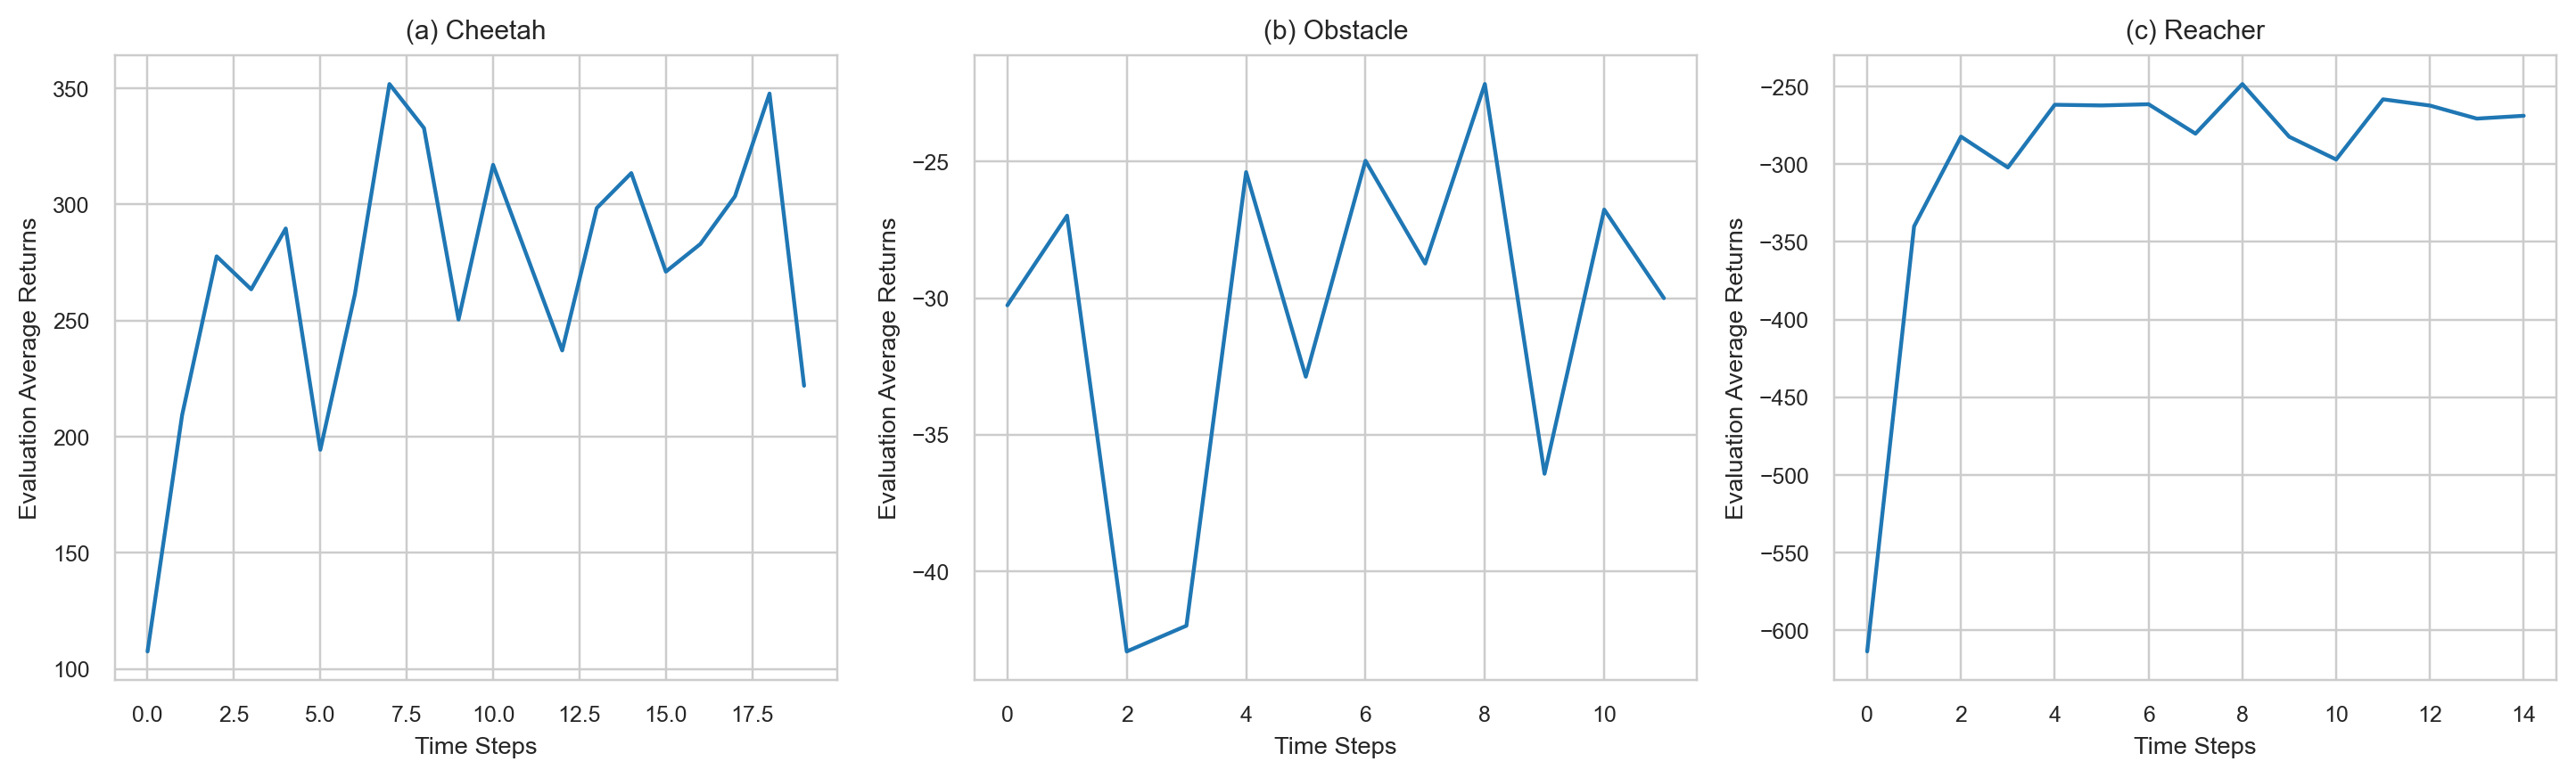

In [30]:
cheetah_df = pd.read_csv(
    osp.join('./data/hw4/q3',
             'run-hw4_q3_cheetah_cheetah-cs285-v0_31-10-2022_03-52-44'
             '-tag-Eval_AverageReturn.csv')
)
_process_df(cheetah_df, name='Evaluation Average Returns')
obstacle_df = pd.read_csv(
    osp.join('./data/hw4/q3',
             'run-hw4_q3_obstacles_obstacles-cs285-v0_31-10-2022_03-52-44'
             '-tag-Eval_AverageReturn.csv')
)
_process_df(obstacle_df, name='Evaluation Average Returns')
reacher_df = pd.read_csv(
    osp.join('./data/hw4/q3',
             'run-hw4_q3_reacher_reacher-cs285-v0_31-10-2022_03-52-44'
             '-tag-Eval_AverageReturn.csv')
)
_process_df(reacher_df, name='Evaluation Average Returns')

fig = plt.figure(figsize=(13, 4), dpi=224)
for i, (df, name) in enumerate(zip([cheetah_df, obstacle_df, reacher_df],
                                   ['Cheetah', 'Obstacle', 'Reacher'])):
    ax = fig.add_subplot(1, 3, i+1)
    ax = sns.lineplot(data=df,
                      x='Time Steps',
                      y='Evaluation Average Returns',
                      ax=ax)
    ax.set_title(f'({chr(97 + i)}) {name:s}')

fig.tight_layout()
fig.savefig('../docs/hw4_report/img/q3.png')

## Problem 4

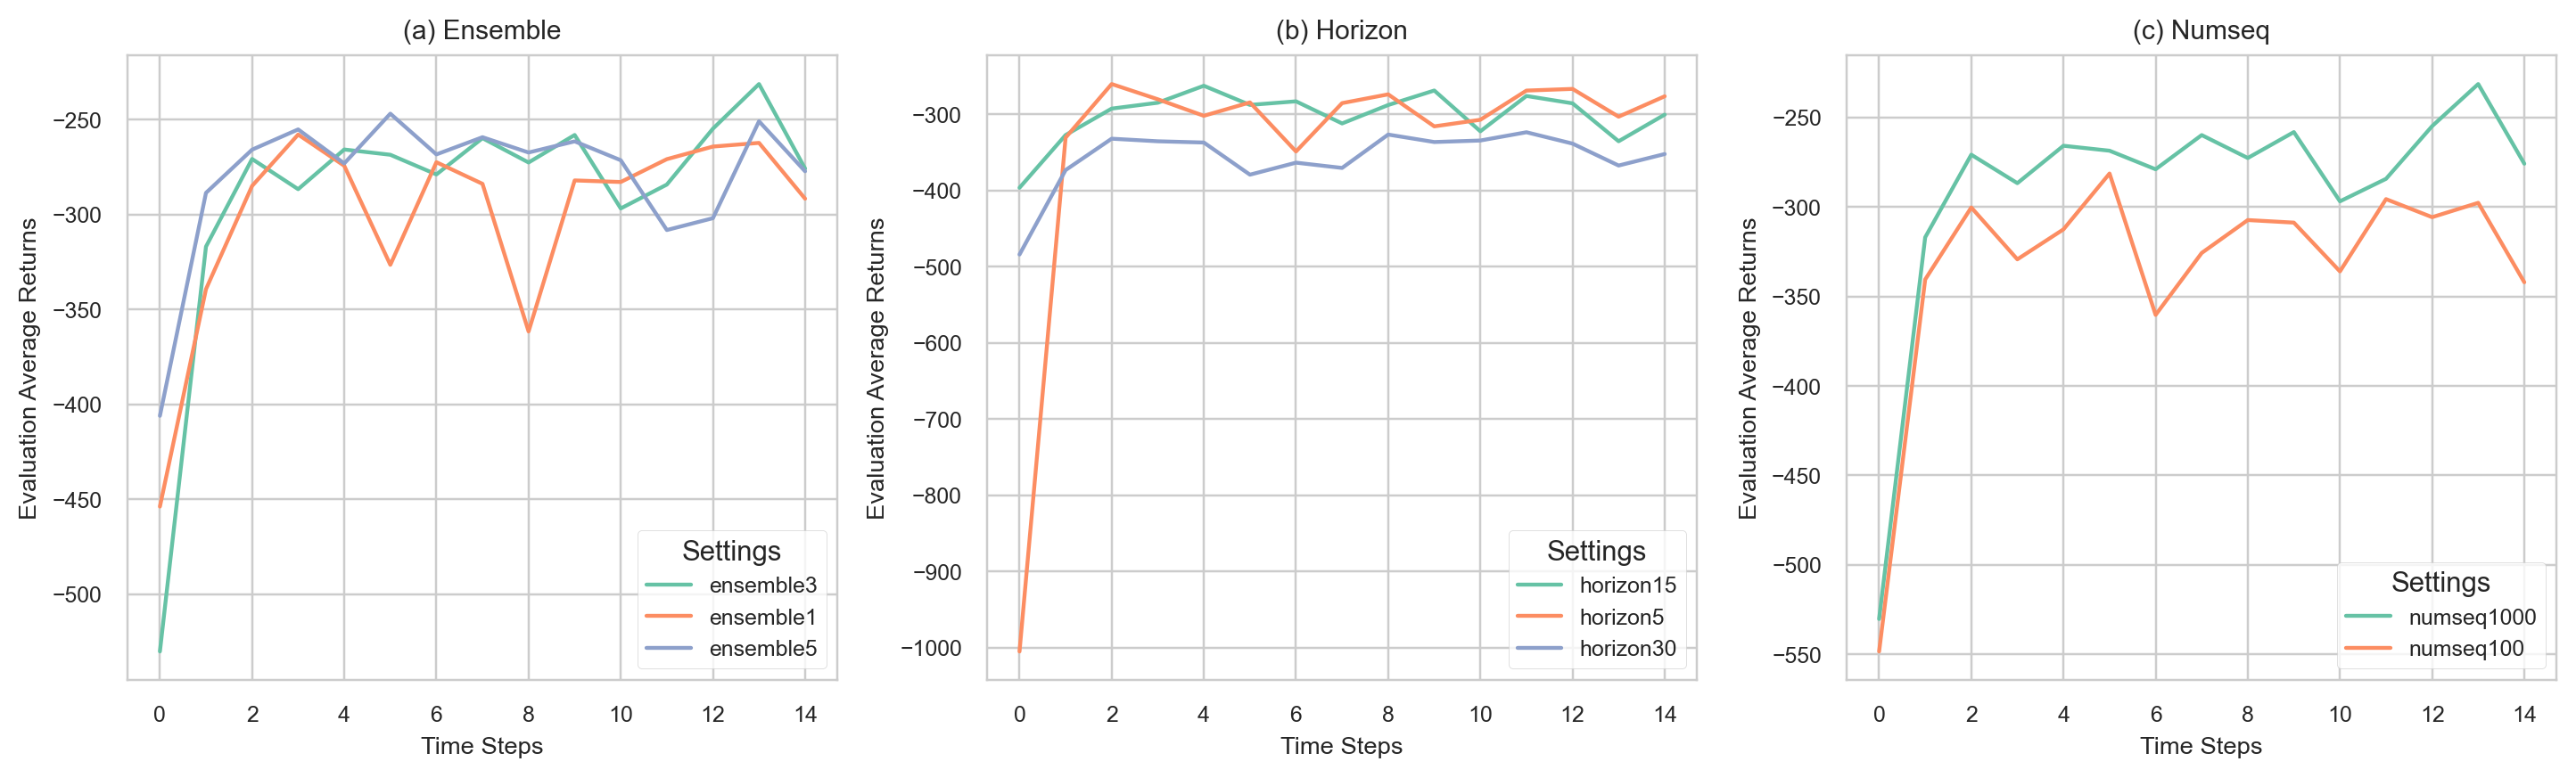

In [29]:
ensemble, horizon, numseq = [], [], []

fig = plt.figure(figsize=(13, 4), dpi=224)

for i, (keyword, container) in enumerate(
    zip(['ensemble', 'horizon', 'numseq'],
        [ensemble, horizon, numseq])):
    for filename in os.listdir('./data/hw4/q4'):
        if keyword in filename:
            df = pd.read_csv(osp.join('./data/hw4/q4', filename))
            _process_df(df, name='Evaluation Average Returns')
            df['Settings'] = filename.split('_')[3]
            container.append(df)

    df = pd.concat(container, axis=0)
    ax = fig.add_subplot(1, 3, i+1)
    ax = sns.lineplot(
        data=df,
        x='Time Steps',
        y='Evaluation Average Returns',
        hue='Settings',
        palette='Set2',
        ax=ax
    )
    ax.set_title(f'({chr(97 + i):s}) {keyword.capitalize():s}')

fig.tight_layout()
fig.savefig('../docs/hw4_report/img/q4.png', dpi=600)


## Problem 5

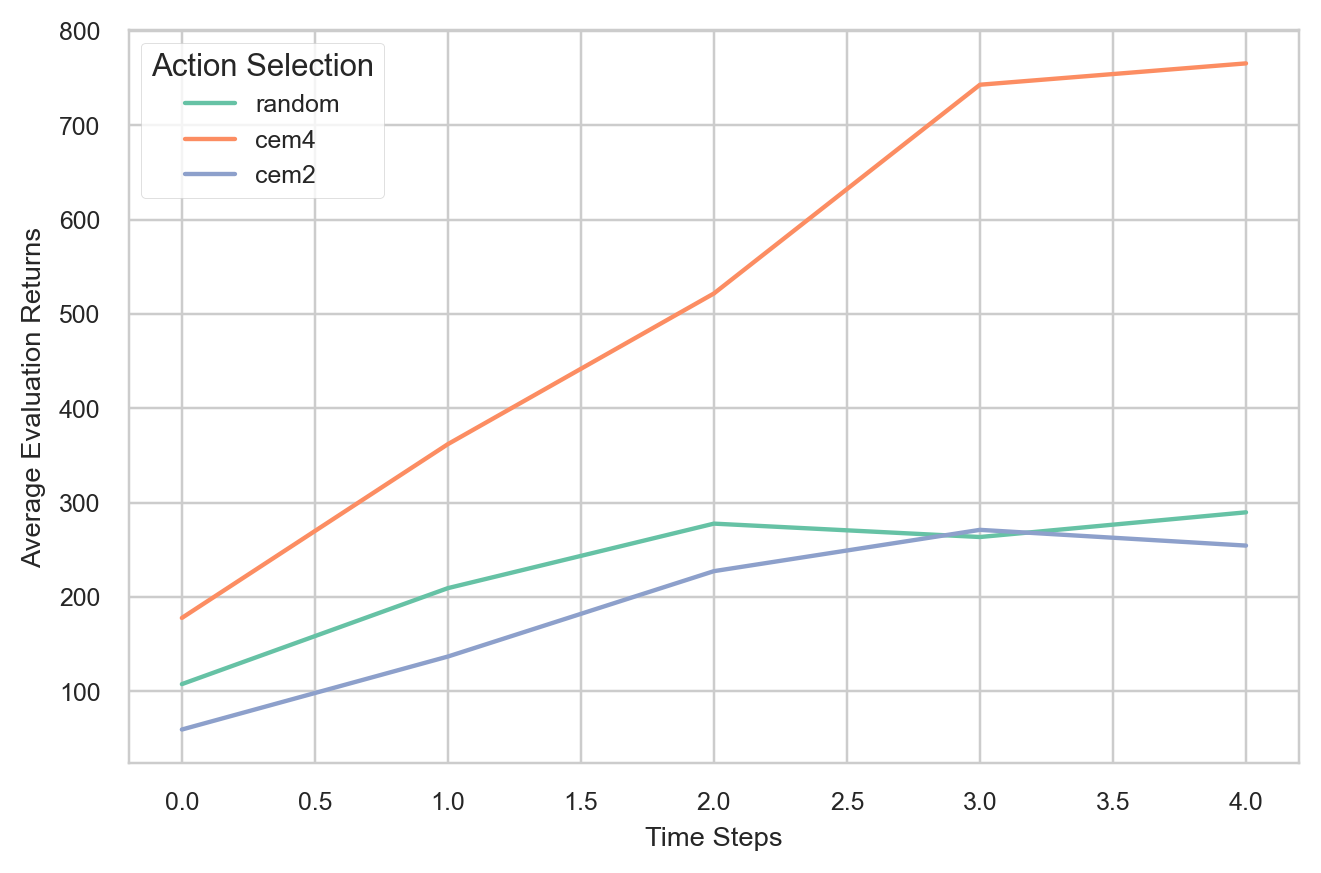

In [36]:
df_list = []
for filename in os.listdir('./data/hw4/q5'):
    if not filename.split('.')[-1] == 'csv':
        continue
    df = pd.read_csv(osp.join('./data/hw4/q5', filename))
    _process_df(df, 'Average Evaluation Returns')
    df['Action Selection'] = ''.join(filename.split('_')[3:5]) \
                             .replace('cheetah-cs285-v0', '') \
                             .replace('_', '')
    df_list.append(df)

df = pd.concat(df_list, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=224)
ax = sns.lineplot(
    data=df,
    x='Time Steps',
    y='Average Evaluation Returns',
    hue='Action Selection',
    palette='Set2',
    ax=ax
)
fig.tight_layout()
fig.savefig('../docs/hw4_report/img/q5.png', dpi=600)

## Problem 6

In [ ]:
name_map = {
    'rlen1': 'Dyna',
    'rlen10': 'MBPO',
    'rlenl0': 'Model-free SAC baseline'
}